In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data Understanding

In [2]:
df = pd.read_excel('Food Delivery Time Prediction Case Study.xlsx')

df.head()



,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30


In [3]:
# shape
print("Jumlah baris dan kolom: ", df.shape)

# Tipe data
print("\nipe data: ")
print(df.dtypes)

# Statistik deskriptif
print("\nStatistik deskriptif: ")
print(df.describe())

# Cek missing value
print("\nMissing value: ")
print(df.isnull().sum())

# Cek duplikasi value
print("\nDuplikasi value: ", df.duplicated().sum())

Jumlah baris dan kolom:  (45593, 11)

ipe data: 
ID                              object
Delivery_person_ID              object
Delivery_person_Age              int64
Delivery_person_Ratings        float64
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Type_of_order                   object
Type_of_vehicle                 object
Time_taken(min)                  int64
dtype: object

Statistik deskriptif: 
       Delivery_person_Age  Delivery_person_Ratings  Restaurant_latitude  \
count         45593.000000             45593.000000         45593.000000   
mean             29.544075                 4.632367            17.017729   
std               5.696793                 0.327708             8.185109   
min              15.000000                 1.000000           -30.905562   
25%              25.000000                 4.600000            12.933284   
50%              29.000000  

Data Preparation

In [4]:
def haversine_distcane(lat1, lon1, lat2, lon2):
    """
    Menghitung jarak antara dua titik di permukaan bumi menggunakan rumus haversine.
    """
    R = 6371  # Radius bumi dalam kilometer
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)

    a = np.sin(delta_phi / 2) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    return R * c


df['distance'] = haversine_distcane(
    df['Restaurant_latitude'],
    df['Restaurant_longitude'],
    df['Delivery_location_latitude'],
    df['Delivery_location_longitude']
)

df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min),distance
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24,3.025149
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33,20.183530
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26,1.552758
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21,7.790401
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30,6.210138


In [5]:
df_encoded = pd.get_dummies(df, columns=['Type_of_vehicle'], drop_first=True)
df_encoded.columns = df_encoded.columns.str.strip()

In [6]:
df_encoded.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Time_taken(min),distance,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,24,3.025149,False,True,False
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,33,20.183530,False,False,True
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,26,1.552758,False,True,False
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,21,7.790401,False,True,False
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,30,6.210138,False,False,True


In [7]:
df_model = df_encoded.drop(columns=[
    'ID', 'Delivery_person_ID',
    'Restaurant_latitude', 'Restaurant_longitude',
    'Delivery_location_latitude', 'Delivery_location_longitude',
    'Type_of_order'
])

In [9]:
df_model.head()

# shape
print("Jumlah baris dan kolom: ", df_model.shape)

# Tipe data
print("\ntipe data: ")
print(df_model.dtypes)

Jumlah baris dan kolom:  (45593, 7)

tipe data: 
Delivery_person_Age                   int64
Delivery_person_Ratings             float64
Time_taken(min)                       int64
distance                            float64
Type_of_vehicle_electric_scooter       bool
Type_of_vehicle_motorcycle             bool
Type_of_vehicle_scooter                bool
dtype: object


Data Visualization

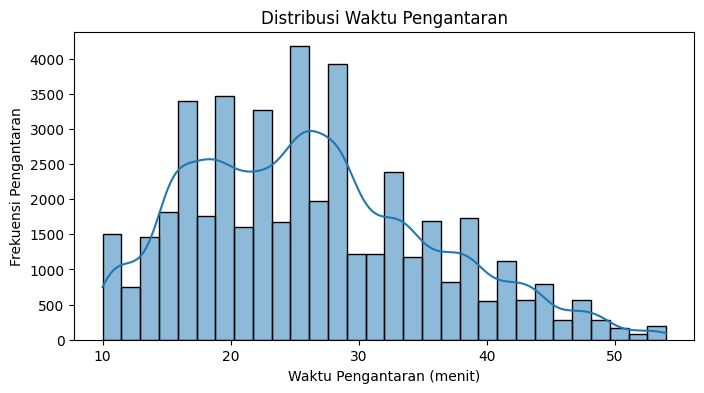

In [9]:
plt.figure(figsize=(8, 4))
sns.histplot(df_model['Time_taken(min)'], bins=30, kde=True)
plt.title('Distribusi Waktu Pengantaran')
plt.xlabel('Waktu Pengantaran (menit)')
plt.ylabel('Frekuensi Pengantaran')
plt.show()

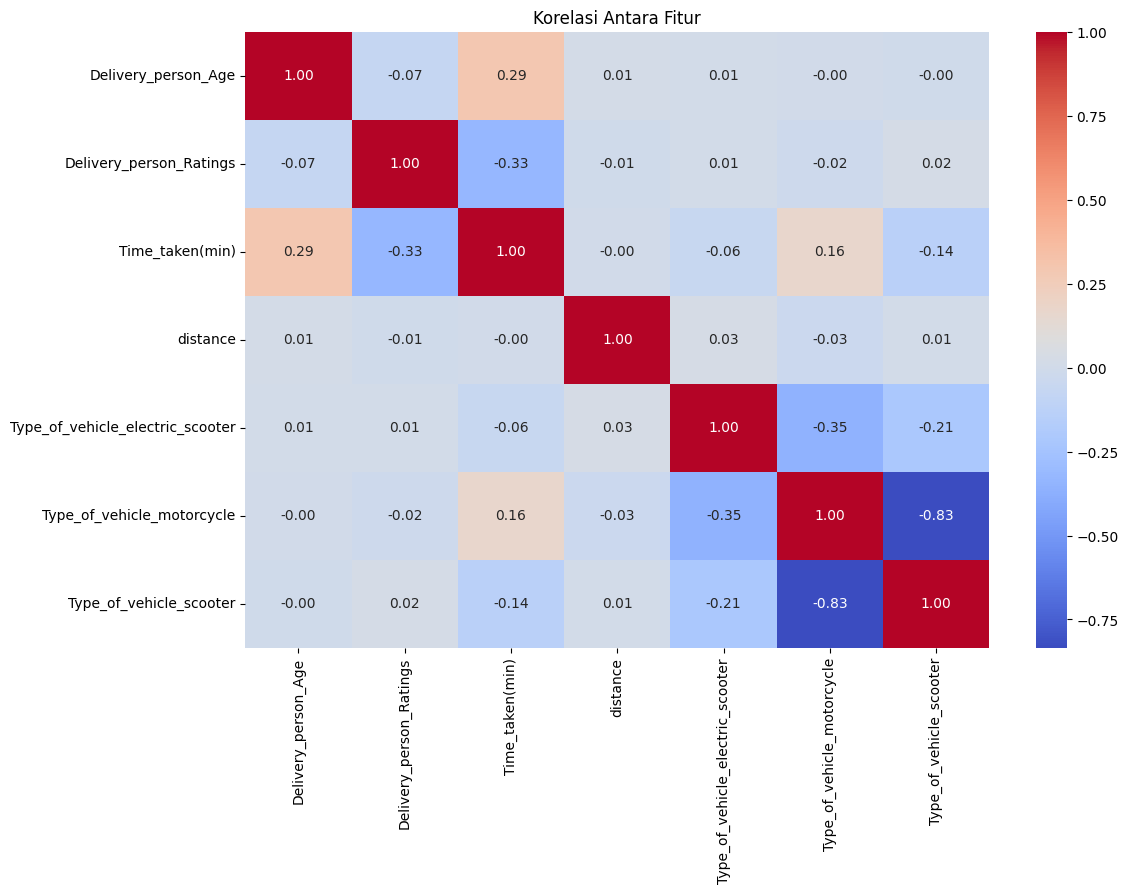

In [10]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_model.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Korelasi Antara Fitur')
plt.show()

Modeling

C:\Users\usER\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\usER\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\usER\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Evaluation Metrics - Random Forest
MAE  : 6.18 menit
RMSE : 7.97 menit
R2   : 0.28

Evaluation Metrics - XGBoost
MAE  : 5.66 menit
RMSE : 7.20 menit
R2   : 0.41

Evaluation Metrics - K-Nearest Neighbors
MAE  : 6.30 menit
RMSE : 8.04 menit
R2   : 0.26


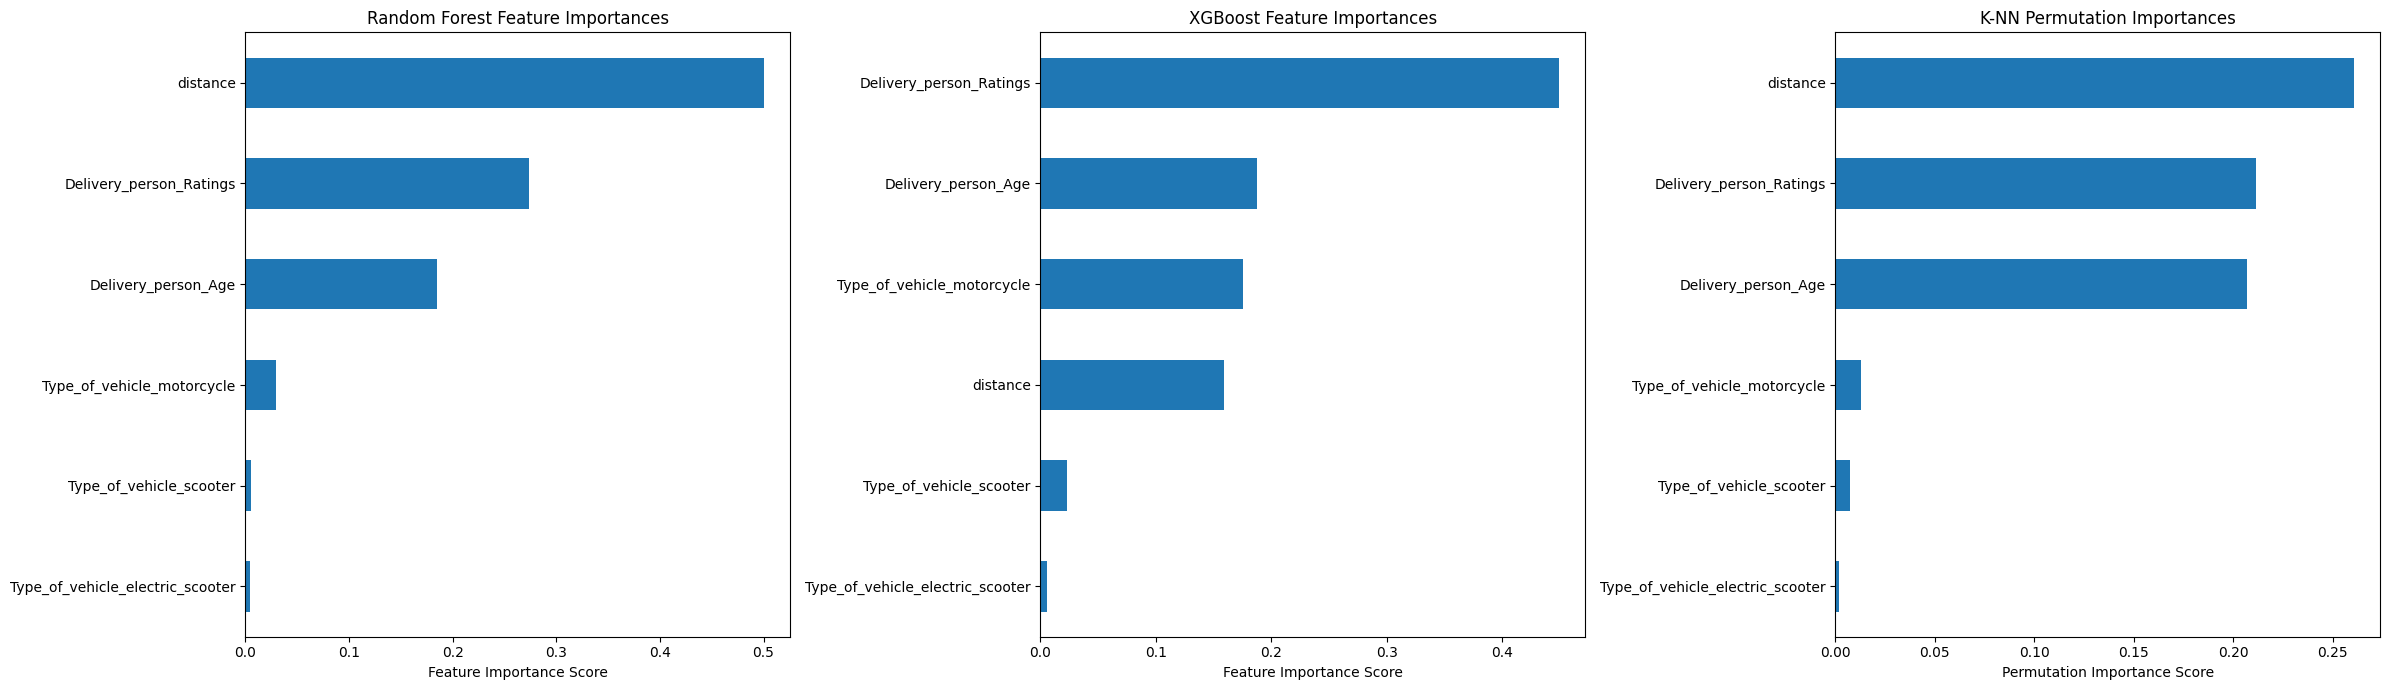

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.inspection import permutation_importance

X = df_model.drop(columns=['Time_taken(min)'], axis=1)
y = df_model['Time_taken(min)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest
model_rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

# XGBoost
xgb_model = XGBRegressor(
    n_estimators=100,
    random_state=42,
    max_depth=5,
    learning_rate=0.1,
    early_stopping_rounds=10
)
xgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)
y_pred_xgb = xgb_model.predict(X_test)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
r2_xgb = r2_score(y_test, y_pred_xgb)

# K-Nearest Neighbors
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
rmse_knn = mean_squared_error(y_test, y_pred_knn, squared=False)
r2_knn = r2_score(y_test, y_pred_knn)

# Print evaluation metrics
print("Evaluation Metrics - Random Forest")
print(f"MAE  : {mae_rf:.2f} menit")
print(f"RMSE : {rmse_rf:.2f} menit")
print(f"R2   : {r2_rf:.2f}\n")

print("Evaluation Metrics - XGBoost")
print(f"MAE  : {mae_xgb:.2f} menit")
print(f"RMSE : {rmse_xgb:.2f} menit")
print(f"R2   : {r2_xgb:.2f}\n")

print("Evaluation Metrics - K-Nearest Neighbors")
print(f"MAE  : {mae_knn:.2f} menit")
print(f"RMSE : {rmse_knn:.2f} menit")
print(f"R2   : {r2_knn:.2f}")

# Feature Importances Comparison (RF, XGB, KNN-permutation)
importances_rf = pd.Series(model_rf.feature_importances_, index=X.columns)
importances_xgb = pd.Series(xgb_model.feature_importances_, index=X.columns)

perm_knn = permutation_importance(knn_model, X_test, y_test, n_repeats=10, random_state=42)
importances_knn = pd.Series(perm_knn.importances_mean, index=X.columns)

fig, axes = plt.subplots(1, 3, figsize=(24, 7))
importances_rf.sort_values().plot(kind='barh', ax=axes[0], title='Random Forest Feature Importances')
importances_xgb.sort_values().plot(kind='barh', ax=axes[1], title='XGBoost Feature Importances')
importances_knn.sort_values().plot(kind='barh', ax=axes[2], title='K-NN Permutation Importances')
axes[0].set_xlabel('Feature Importance Score')
axes[1].set_xlabel('Feature Importance Score')
axes[2].set_xlabel('Permutation Importance Score')
plt.tight_layout()
plt.show()

In [ ]:
import joblib

# joblib.dump(model_rf, 'model_rf.pkl')
joblib.dump(xgb_model, 'model_xgb                                                                                                                                                                                                                                                                                                                                                                                                           .pkl')

['model_xgb.pkl']

In [78]:
print(xgb_model.get_booster().feature_names)
# print(model_rf.get_booster().feature_names)

['Delivery_person_Age', 'Delivery_person_Ratings', 'distance', 'Type_of_vehicle_electric_scooter', 'Type_of_vehicle_motorcycle', 'Type_of_vehicle_scooter']
